In [44]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, HTML
%matplotlib inline

In [45]:
X = pd.read_csv("churn.csv")
Y = X['Churn']
X = X.drop(['Churn'],axis=1)

#remove cols not used for learning
X = X.drop(["Phone","Area Code","State"],axis=1)
X.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.75)

# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy on the training subset: 0.999
Accuracy on the test subset: 0.920


In [47]:
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)

score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.92


In [48]:
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)

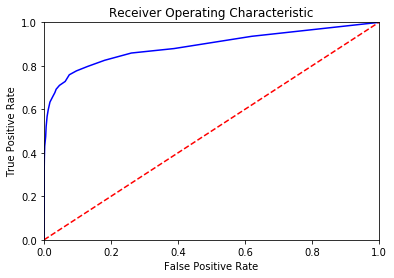

In [49]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
2,0.147943,Day Mins
10,0.138012,Day Charge
6,0.116734,CustServ Calls
7,0.085683,Int'l Plan
15,0.069661,Intl Calls


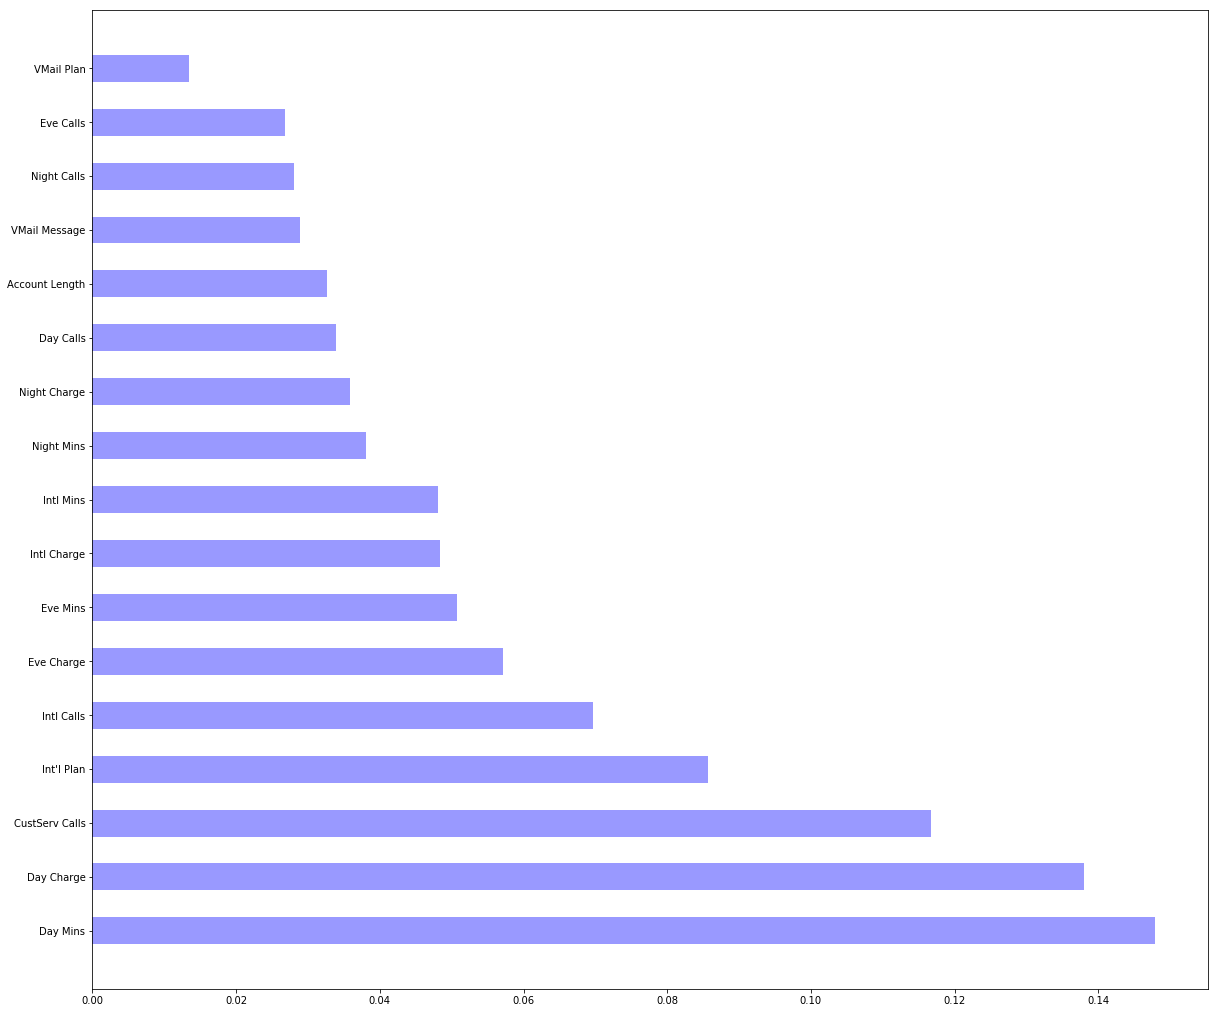

In [50]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = X_test.columns.values
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [54]:
X_test["prob_true"] = probs[:, 1]
df_risky = X_test[X_test["prob_true"] > 0.9]
df_risky.head()

c:\users\suren.samarasinghe\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,prob_true
2388,161,0,297.9,238.1,240.5,8.9,1,0,0,141,50.64,107,20.24,93,10.82,5,2.40,1.000000
2099,71,0,290.4,253.9,263.3,10.1,3,0,0,108,49.37,92,21.58,126,11.85,5,2.73,0.933333
2614,125,0,298.4,270.5,107.3,12.2,0,1,0,78,50.73,142,22.99,84,4.83,2,3.29,0.933333
1350,55,0,285.7,230.9,230.7,14.8,0,0,0,124,48.57,106,19.63,140,10.38,7,4.00,0.966667
914,179,0,287.3,288.0,266.0,10.5,0,0,0,123,48.84,114,24.48,112,11.97,4,2.84,0.933333
